In [1]:
using OPFRecourse, Gurobi, Distributions, Plots, StatPlots, DataStructures, JLD

# Volatility Analysis
In this section, we look at (i) how the number of unique bases increase w.r.t the volatility of the error model, and (ii) how that affects the coverage of the model (based on number of scenarios it accounts for) when we form ensemble recourse policies based on varying numbers of bases.

In [2]:
data_file = string(Pkg.dir(),"/OPFRecourse/test/data/pglib-opf/pglib_opf_case300_ieee.m")
@time ref = [OPFRecourse.NetworkReference(data_file, σscaling=0.01*i) for i in 1:5];

 12.968554 seconds (4.98 M allocations: 282.395 MiB, 3.14% gc time)


In [3]:
srand(1234)
scenarios = [OPFRecourse.OPFScenarios(ref[i], nsamples = 10_000) for i in 1:5];

Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:03:04


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:02:47


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:02:60


Academic license - for non-commercial use only


Progress:   1%|                                         |  ETA: 0:04:10WARNING: Not solved to optimality, status: Infeasible
Progress:  50%|████████████████████                     |  ETA: 0:01:49WARNING: Not solved to optimality, status: Infeasible
Progress:  68%|████████████████████████████             |  ETA: 0:01:09WARNING: Not solved to optimality, status: Infeasible
Progress:  70%|█████████████████████████████            |  ETA: 0:01:05WARNING: Not solved to optimality, status: Infeasible
Progress: 100%|█████████████████████████████████████████| Time: 0:03:33


Academic license - for non-commercial use only


Progress:   1%|█                                        |  ETA: 0:03:23WARNING: Not solved to optimality, status: Infeasible
Progress:   6%|██                                       |  ETA: 0:03:09WARNING: Not solved to optimality, status: Infeasible
Progress:   8%|███                                      |  ETA: 0:02:58WARNING: Not solved to optimality, status: Infeasible
Progress:  16%|██████                                   |  ETA: 0:02:38WARNING: Not solved to optimality, status: Infeasible
Progress:  24%|██████████                               |  ETA: 0:02:21WARNING: Not solved to optimality, status: Infeasible
Progress:  27%|███████████                              |  ETA: 0:02:15WARNING: Not solved to optimality, status: Infeasible
Progress:  28%|███████████                              |  ETA: 0:02:14WARNING: Not solved to optimality, status: Infeasible
Progress:  30%|████████████                             |  ETA: 0:02:10WARNING: Not solved to optimality, status: Infeasible



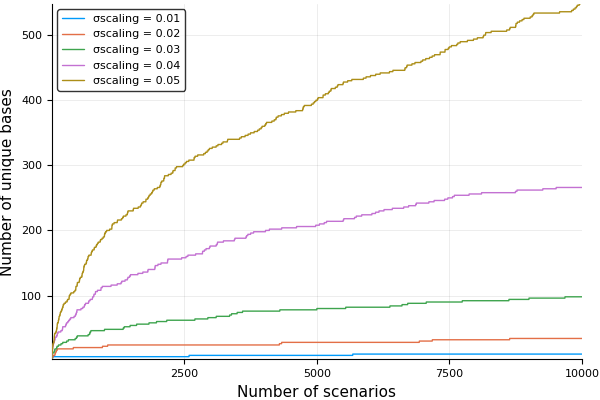

In [5]:
plot(
    [
        length(unique(scenarios[1].whichbasis[1:j,:],1))
        for j in 1:size(scenarios[1].scenarios,1)
    ],
    ylabel="Number of unique bases",
    xlabel="Number of scenarios",
    label="σscaling = 0.01"
)
for i in 2:4
    plot!(
        [
            length(unique(scenarios[i].whichbasis[1:j,:],1))
            for j in 1:size(scenarios[i].scenarios,1)
        ],
        label="σscaling = 0.0$i"
    )
end
plot!(
    [
        length(unique(scenarios[5].whichbasis[1:j,:],1))
        for j in 1:size(scenarios[5].scenarios,1)
    ],
    label="σscaling = 0.05"
)

  likely near In[20]:1
  likely near In[20]:1
  likely near In[20]:1



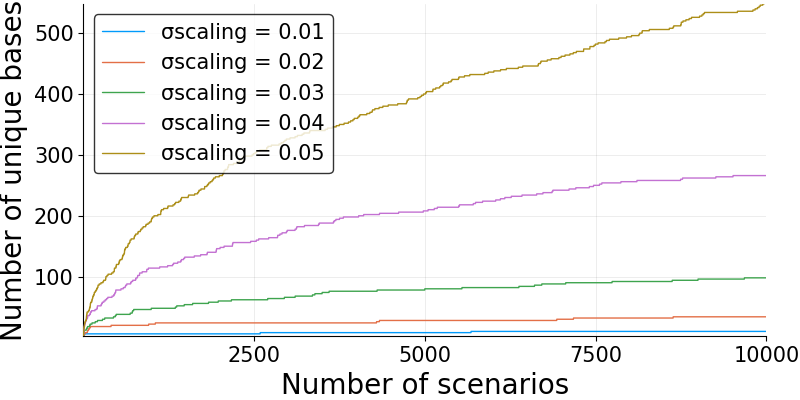

In [20]:
plt = plot(
    [
        length(unique(scenarios[1].whichbasis[1:j,:],1))
        for j in 1:size(scenarios[1].scenarios,1)
    ],
    ylabel="Number of unique bases",
    xlabel="Number of scenarios",
    label="σscaling = 0.01",
    legendfont=Plots.Font("sans-serif",15,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)),
    guidefont=Plots.Font("sans-serif",20,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)),
    tickfont=Plots.Font("sans-serif",15,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)),
    size=(800,400)
)
for i in 2:4
    plot!(plt,
        [
            length(unique(scenarios[i].whichbasis[1:j,:],1))
            for j in 1:size(scenarios[i].scenarios,1)
        ],
        label="σscaling = 0.0$i"
    )
end
plot!(plt,
    [
        length(unique(scenarios[5].whichbasis[1:j,:],1))
        for j in 1:size(scenarios[5].scenarios,1)
    ],
    label="σscaling = 0.05"
)
# PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.0)
plt

In [21]:
function scenario_p(scenarios, i)
    uniquescenarios = unique(scenarios.whichbasis[1:i,:],1)
    [length(scenarios.whichscenario[(uniquescenarios[b,1],uniquescenarios[b,2])]) for b in 1:size(uniquescenarios,1)]
end

scenario_p (generic function with 1 method)

  likely near In[22]:1
  likely near In[22]:1
  likely near In[22]:1



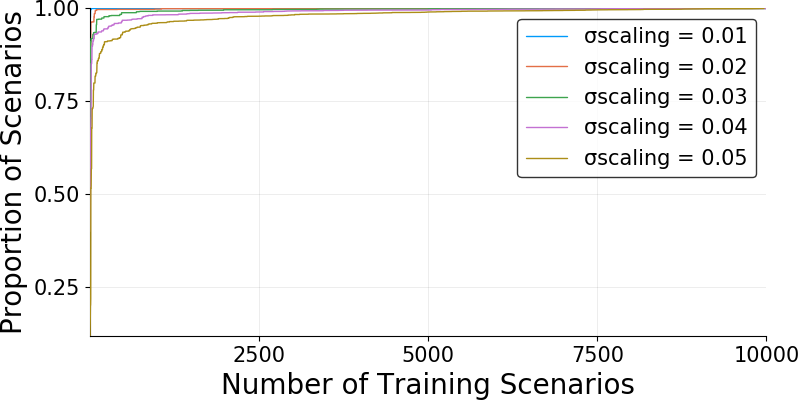

In [22]:
plot(
    [sum(scenario_p(scenarios[1], i)) for i in 1:size(scenarios[1].scenarios,1)] ./ size(scenarios[1].scenarios,1),
    ylabel="Proportion of Scenarios",
    xlabel="Number of Training Scenarios",
    label="σscaling = 0.01",
    legendfont=Plots.Font("sans-serif",15,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)),
    guidefont=Plots.Font("sans-serif",20,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)),
    tickfont=Plots.Font("sans-serif",15,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)),
    size=(800,400)
)
for j in 2:4
    plot!(
        [sum(scenario_p(scenarios[j], i)) for i in 1:size(scenarios[j].scenarios,1)] ./ size(scenarios[j].scenarios,1),
        ylabel="Proportion of Scenarios",
        xlabel="Number of Training Scenarios",
        label="σscaling = 0.0$j"
    )
end
plot!(
    [sum(scenario_p(scenarios[5], i)) for i in 1:size(scenarios[5].scenarios,1)] ./ size(scenarios[5].scenarios,1),
    ylabel="Proportion of Scenarios",
    xlabel="Number of Training Scenarios",
    label="σscaling = 0.05"
)

  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2



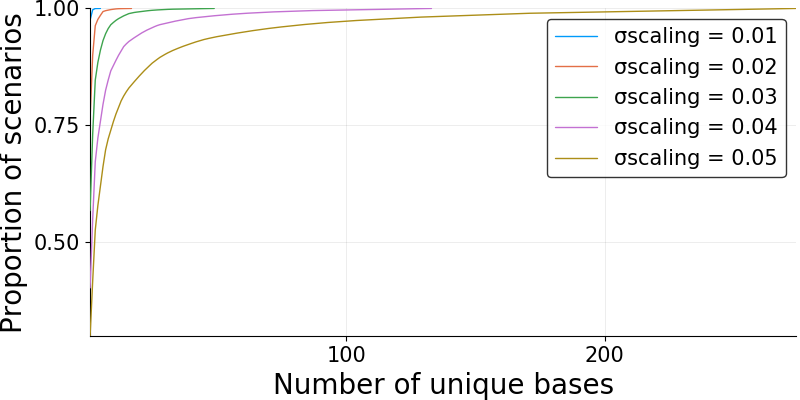

In [27]:
basiscounts = sort!(map(length, values(scenarios[1].whichscenario)), rev=true)
plot(
    cumsum(basiscounts) / sum(basiscounts),
    xlabel="Number of unique bases",
    ylabel="Proportion of scenarios",
    label="σscaling = 0.01",
    legendfont=Plots.Font("sans-serif",15,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)),
    guidefont=Plots.Font("sans-serif",20,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)),
    tickfont=Plots.Font("sans-serif",15,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)),
    size=(800,400)
)
for j in 2:4
    basiscounts = sort!(map(length, values(scenarios[j].whichscenario)), rev=true)
    plot!(
        cumsum(basiscounts) / sum(basiscounts),
        label="σscaling = 0.0$j"
    )
end
basiscounts = sort!(map(length, values(scenarios[5].whichscenario)), rev=true)
plot!(
    cumsum(basiscounts) / sum(basiscounts),
    label="σscaling = 0.05"
)

# Inspection of Solutions

In this section, we focus on understanding when the control switches between the different recourse policies. We focus on a case with 3 buses, because we can visualize that was the case with the highest volatility for which all scenarios were still feasible, to reflect a realistic operating system.

In [8]:
;cat ../test/data/pglib-opf/pglib_opf_case3_lmbd.m

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%                                                                  %%%%%
%%%%    IEEE PES Power Grid Library - Optimal Power Flow - v17.08     %%%%%
%%%%          (https://github.com/power-grid-lib/pglib-opf)           %%%%%
%%%%               Benchmark Group - Typical Operations               %%%%%
%%%%                        30 - August - 2017                        %%%%%
%%%%                                                                  %%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
%   The semidefinite relaxation of the OPF problem successfully solves 
%   this network with a value of 60 MVA for the line-flow limit on the line from
%   bus 2 to bus 3. The semidefinite relaxation fails to give a physically
%   meaningful solution to this network with a value of 50 MVA for the line-flow
%   limit on this line. See the following publication for further details.
%
%   

In [9]:
data_file = string(Pkg.dir(),"/OPFRecourse/test/data/pglib-opf/pglib_opf_case3_lmbd.m")

"/Users/yeesian/.julia/v0.6/OPFRecourse/test/data/pglib-opf/pglib_opf_case3_lmbd.m"

In [10]:
@time ref = NetworkReference(data_file, σscaling=0.4);

  2.054754 seconds (596.88 k allocations: 30.867 MiB, 0.71% gc time)


In [11]:
srand(1234)
scenarios = OPFScenarios(ref, nsamples = 10_000);

Academic license - for non-commercial use only


Progress:  23%|██████████                               |  ETA: 0:00:03WARNING: Not solved to optimality, status: Infeasible
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


We can see that two different optimal bases are hit by the scenarios:

In [12]:
scenarios.whichscenario

Dict{Tuple{Int64,Int64},Array{Int64,1}} with 2 entries:
  (2, 2) => [24, 39, 41, 45, 61, 139, 158, 188, 225, 282  …  9650, 9670, 9707, …
  (1, 1) => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  9986, 9987, 9988, 9989, 9990, 99…

By counting the number of scenarios corresponding to each basis, we can see that `basis 1` is optimal for the vast majority of the scenarios

In [13]:
map(length,values(scenarios.whichscenario))

2-element Array{Int64,1}:
  334
 9661

Let's do a scatterplot of the scenarios that corresponds to each basis:


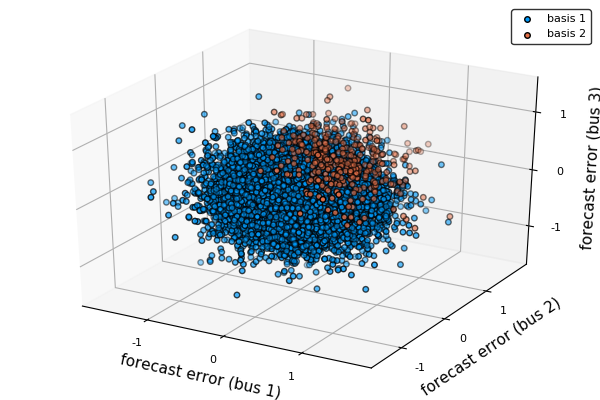

In [14]:
scatter3d(
    scenarios.scenarios[scenarios.whichscenario[(1,1)],1],
    scenarios.scenarios[scenarios.whichscenario[(1,1)],2],
    scenarios.scenarios[scenarios.whichscenario[(1,1)],3],
    label="basis 1",
    zlabel="forecast error (bus 3)",
    ylabel="forecast error (bus 2)",
    xlabel="forecast error (bus 1)"
)
scatter3d!(
    scenarios.scenarios[scenarios.whichscenario[(2,2)],1],
    scenarios.scenarios[scenarios.whichscenario[(2,2)],2],
    scenarios.scenarios[scenarios.whichscenario[(2,2)],3],
    label="basis 2"
)

Theory tells us that the set of scenarios for which each basis is optimal will be disjoint convex polyhedra. Since there are only 2 unique optimal bases here, the set of scenarios for which they are optimal is going to be linearly separable.

It is instructive to look at the boundary conditions under which we switch from the first choice of a basis function to an alternative basis function:

In [15]:
scenarios.solutions

9995×3 Array{Float64,2}:
 1.38476   1.96828   0.0
 0.420562  1.90587   0.0
 0.889924  1.95431   0.0
 1.6878    1.94362   0.0
 1.9247    0.668274  0.0
 1.16134   1.91025   0.0
 0.408725  2.77667   0.0
 2.77529   0.92341   0.0
 2.76366   1.77453   0.0
 1.49761   1.6794    0.0
 1.81618   1.34314   0.0
 1.1282    1.77728   0.0
 1.54593   1.72608   0.0
 ⋮                      
 0.732247  1.3619    0.0
 1.73971   1.5433    0.0
 0.665552  2.18418   0.0
 1.05233   2.10882   0.0
 0.983644  1.34824   0.0
 3.365     1.88798   0.0
 2.07807   1.682     0.0
 1.13901   2.35002   0.0
 2.45691   1.78088   0.0
 2.00699   2.43748   0.0
 2.41672   2.13494   0.0
 0.743877  1.64007   0.0

We now do a scatterplot of the power generation plan for each scenario. Since generator 3 is always 0, we can exclude it from the scatterplot.


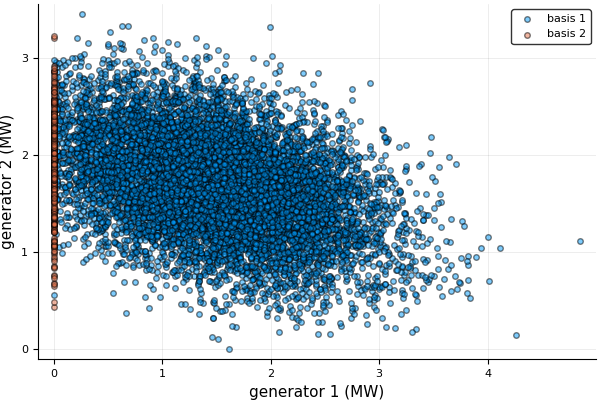

In [16]:
scatter(
    scenarios.solutions[scenarios.whichscenario[(1,1)],1],
    scenarios.solutions[scenarios.whichscenario[(1,1)],2],
    label="basis 1", alpha=0.5,
    xlabel="generator 1 (MW)", ylabel="generator 2 (MW)"
)
scatter!(
    scenarios.solutions[scenarios.whichscenario[(2,2)],1],
    scenarios.solutions[scenarios.whichscenario[(2,2)],2],
    label="basis 2", alpha=0.5
)

The scatterplot shows us that we should switch from `basis 1` to `basis 2` in those cases where using `basis 1` would result in a violation of the lower limit for generator `1`

## Chance-Constraint Formulation
We also look at how the CC-OPF (and Full CC-OPF) with affine recourse would fare here.

  0.001120 seconds (3.08 k allocations: 162.578 KiB)
Academic license - for non-commercial use only
  0.001657 seconds (3.08 k allocations: 162.578 KiB)
Academic license - for non-commercial use only
  0.001947 seconds (3.08 k allocations: 162.578 KiB)
Academic license - for non-commercial use only
  0.001223 seconds (3.08 k allocations: 162.578 KiB)
Academic license - for non-commercial use only



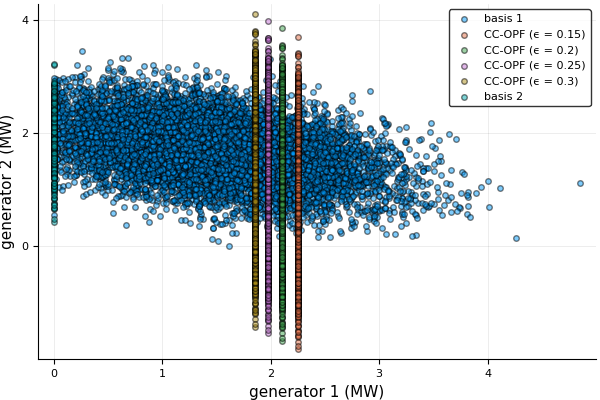

In [17]:
epsilons = collect(0.15:0.05:0.3)
ccopf = []
for ϵ in epsilons
    @time ref = NetworkReference(data_file, σscaling=0.4, bus_prob=1-ϵ, line_prob=1-ϵ);
    ccopf_ϵ = ChanceConstrainedOPF(ref, Gurobi.GurobiSolver(OutputFlag=0))
    JuMP.solve(ccopf_ϵ.model, method = :Reformulate)
    push!(ccopf, ccopf_ϵ)
end

ccopf_solutions = [
    hcat([get_opf_solution(ccopf[j], scenarios.scenarios[i,:]) for i in 1:size(scenarios.scenarios,1)]...)'
    for j in eachindex(ccopf)
]

scatter(
    scenarios.solutions[scenarios.whichscenario[(1,1)],1],
    scenarios.solutions[scenarios.whichscenario[(1,1)],2],
    label="basis 1", alpha=0.5,
    xlabel="generator 1 (MW)", ylabel="generator 2 (MW)"
)
for j in eachindex(ccopf_solutions)
    scatter!(
        ccopf_solutions[j][:,1],
        ccopf_solutions[j][:,2],
        label="CC-OPF (ϵ = $(epsilons[j]))", alpha=0.5,
    )
end
scatter!(
    scenarios.solutions[scenarios.whichscenario[(2,2)],1],
    scenarios.solutions[scenarios.whichscenario[(2,2)],2],
    label="basis 2", alpha=0.5
)

We can see that the aggregated recourse policy restricts the set of possible solutions (for any given recourse policy) to a 1-dimensional space, and it recommends using generator 2 to do the power balance, while fixing generator 1 to fixed values: as it becomes more conservative in ensuring that the constraints are satisfied, it shifts more of the power generation onto generator 1.

Switching our attention to chance constraint OPF with full affine recourse:

  0.020539 seconds (3.10 k allocations: 162.859 KiB, 91.33% gc time)
Academic license - for non-commercial use only
  0.001128 seconds (3.08 k allocations: 162.578 KiB)
Academic license - for non-commercial use only



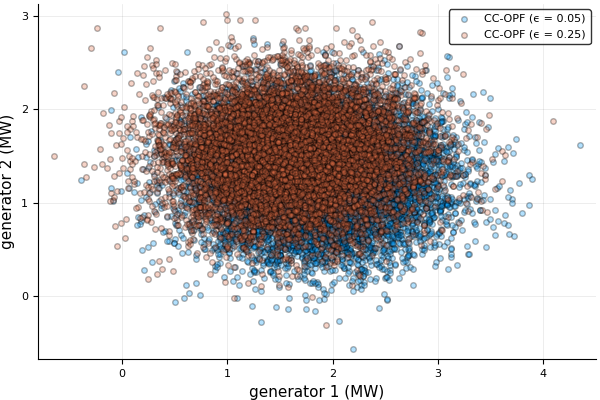

In [18]:
epsilons = [0.05,0.25]
ccopf = []
for ϵ in epsilons
    @time ref = NetworkReference(data_file, σscaling=0.4, bus_prob=1-ϵ, line_prob=1-ϵ);
    ccopf_ϵ = FullChanceConstrainedOPF(ref, Gurobi.GurobiSolver(OutputFlag=0))
    JuMP.solve(ccopf_ϵ.model, method = :Reformulate)
    push!(ccopf, ccopf_ϵ)
end

ccopf_solutions = [
    hcat([get_opf_solution(ccopf[j], scenarios.scenarios[i,:]) for i in 1:size(scenarios.scenarios,1)]...)'
    for j in eachindex(ccopf)
]

scatter(
    ccopf_solutions[1][:,1],
    ccopf_solutions[1][:,2],
    label="CC-OPF (ϵ = $(epsilons[1]))", alpha=0.3,
    xlabel="generator 1 (MW)", ylabel="generator 2 (MW)"
)

scatter!(
    ccopf_solutions[2][:,1],
    ccopf_solutions[2][:,2],
    label="CC-OPF (ϵ = $(epsilons[2]))", alpha=0.3,
)

In this case, we can see that the distribution of solutions under the CC-OPF with full affine recourse has an additional degree of freedom, and is able to capture the required variation in the optimal power generation better than the restricted CC-OPF. However, since it is only restricted to linear recourse policies, it has to balance between lowering the cost of generation while still maintaining its probabilistic guarantee: as it becomes more conservative in ensuring that the constraints are satisfied, it shifts more of the power generation onto generator 1, which is 4 times as expensive as generator 2.

# Performance Comparison
In this section, we perform an analysis of how the (i) generation cost and (ii) transmission violations vary with the number of basis functions that we take into account.

In [19]:
data_file = string(Pkg.dir(),"/OPFRecourse/test/data/pglib-opf/pglib_opf_case300_ieee.m")
@time ref = OPFRecourse.NetworkReference(data_file, σscaling=0.04);

  0.047075 seconds (157.92 k allocations: 11.059 MiB)


In [20]:
m = SingleScenarioOPF(ref, Gurobi.GurobiSolver(OutputFlag=0))

srand(1234)
scenarios = OPFRecourse.OPFScenarios(ref, m, nsamples = 10_000);

Academic license - for non-commercial use only


Progress:  18%|███████                                  |  ETA: 0:02:06WARNING: Not solved to optimality, status: Infeasible
Progress:  46%|███████████████████                      |  ETA: 0:01:12WARNING: Not solved to optimality, status: Infeasible
Progress:  54%|██████████████████████                   |  ETA: 0:01:00WARNING: Not solved to optimality, status: Infeasible
Progress: 100%|█████████████████████████████████████████| Time: 0:02:07


In [21]:
sortedbases = sort(
    collect(keys(scenarios.whichscenario)),
    by = b -> length(scenarios.whichscenario[b]),
    rev=true
)

136-element Array{Tuple{Int64,Int64},1}:
 (20, 1) 
 (20, 8) 
 (66, 5) 
 (66, 55)
 (8, 64) 
 (85, 31)
 (35, 8) 
 (8, 52) 
 (6, 1)  
 (70, 46)
 (85, 44)
 (86, 5) 
 (68, 55)
 ⋮       
 (95, 51)
 (60, 13)
 (67, 30)
 (17, 69)
 (90, 53)
 (71, 15)
 (65, 30)
 (26, 36)
 (81, 15)
 (70, 68)
 (89, 45)
 (81, 67)

In [22]:
length(scenarios.whichscenario[(20,1)])

4030

In [23]:
length(scenarios.whichscenario[(81,67)])

1

In [24]:
br = [BasisRecourse(ref, m, scenarios.cbases[b1],scenarios.rbases[b2]) for (b1,b2) in sortedbases];

In [33]:
srand(404)
testscenarios = OPFRecourse.OPFScenarios(ref, m, nsamples = 100);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [52]:
nscenarios = size(testscenarios.scenarios,1)
ensemble = EnsembleRecourse(ref, br[1], br[2:5]);
@time solns = [get_opf_solution(ensemble, testscenarios.scenarios[i,:]) for i in 1:nscenarios];
results = DataFrames.DataFrame(Dict(
    :cost => [cost(ref, solns[i]) for i in 1:nscenarios],
    :nviolations => [
        ntransmissionviolations(ref, solns[i], testscenarios.scenarios[i,:]) for i in 1:nscenarios
    ],
    :nbasis => fill(5, nscenarios)
))
for nbasis in 10:5:30
    ensemble = EnsembleRecourse(ref, br[1], br[2:nbasis]);
    @time solns = [get_opf_solution(ensemble, testscenarios.scenarios[i,:]) for i in 1:nscenarios]
    results = vcat(results, DataFrames.DataFrame(Dict(
        :cost => [cost(ref, solns[i]) for i in 1:nscenarios],
        :nviolations => [
            ntransmissionviolations(ref, solns[i], testscenarios.scenarios[i,:]) for i in 1:nscenarios
        ],
        :nbasis => fill(nbasis, nscenarios)

    )))
end

 29.905051 seconds (570.70 M allocations: 10.675 GiB, 10.92% gc time)
 11.465062 seconds (228.29 M allocations: 4.271 GiB, 11.02% gc time)
 17.214260 seconds (342.41 M allocations: 6.405 GiB, 11.06% gc time)
 23.004031 seconds (456.55 M allocations: 8.539 GiB, 11.26% gc time)
 34.381454 seconds (570.69 M allocations: 10.674 GiB, 10.57% gc time)
 41.085036 seconds (684.82 M allocations: 12.809 GiB, 11.68% gc time)



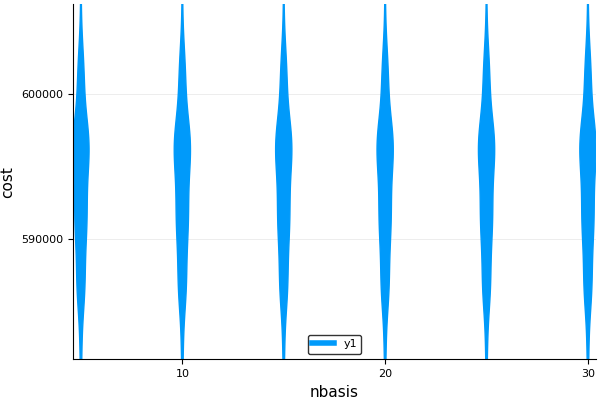

In [55]:
violin(results, :nbasis, :cost)

In [56]:
savefig("demo.png")

In [53]:
DataFrames.aggregate(results[:,[:nbasis,:nviolations]], :nbasis, row -> DataStructures.counter(row))

,nbasis,nviolations_#79
1,5,"DataStructures.Accumulator(0=>97,2=>2)"
2,10,"DataStructures.Accumulator(0=>91,2=>4,3=>2,1=>2)"
3,15,"DataStructures.Accumulator(0=>95,2=>2,3=>1,1=>1)"
4,20,"DataStructures.Accumulator(0=>96,2=>2,3=>1)"
5,25,"DataStructures.Accumulator(0=>97,2=>2)"
6,30,"DataStructures.Accumulator(0=>97,2=>2)"


In [13]:
# Running over OPF Benchmark Cases
for f in [
        "case3_lmbd",
        "case5_pjm",
        "case14_ieee",
        "case24_ieee_rts",
        "case30_as",
        "case30_fsr",
        "case30_ieee",
        "case39_epri",
        "case57_ieee",
        "case73_ieee_rts",
        # "case89_pegase", # (infeasible)
        "case118_ieee",
        "case162_ieee_dtc",
        "case200_pserc",
        "case240_pserc",
        "case300_ieee"
#         "case1354_pegase", # (infeasible)
#         "case1888_rte",
#         "case1951_rte",
#         "case2383wp_k" # (infeasible)
#         case2848_rte
        
    ]
    print("Working on $f: ")
    data_file = string(Pkg.dir(),"/OPFRecourse/test/data/pglib-opf/pglib_opf_", f, ".m")
    for i in 1:5
        @time ref = OPFRecourse.NetworkReference(data_file, σscaling=0.01*i);
        srand(1234)
        scenarios = OPFRecourse.OPFScenarios(ref, nsamples = 10_000);
        JLD.save("$(f)$(i).jld", "scenarios", scenarios)
        print("$i ")
    end
    println()
end

Working on case3_lmbd:   0.006388 seconds (3.07 k allocations: 162.250 KiB)
Academic license - for non-commercial use only
1   0.001164 seconds (3.07 k allocations: 162.250 KiB)
Academic license - for non-commercial use only
2   0.000987 seconds (3.07 k allocations: 162.250 KiB)
Academic license - for non-commercial use only
3   0.001043 seconds (3.07 k allocations: 162.250 KiB)
Academic license - for non-commercial use only
4   0.001045 seconds (3.07 k allocations: 162.250 KiB)
Academic license - for non-commercial use only
5 
Working on case5_pjm:   0.002077 seconds (4.84 k allocations: 248.828 KiB)
Academic license - for non-commercial use only
1 

INFO: extending matpower format with data: areas 1x2


  0.001784 seconds (5.57 k allocations: 287.750 KiB)


INFO: extending matpower format with data: areas 1x2


Academic license - for non-commercial use only
2   0.001698 seconds (5.38 k allocations: 266.797 KiB)
Academic license - for non-commercial use only
3 

INFO: extending matpower format with data: areas 1x2


  0.001763 seconds (5.55 k allocations: 287.375 KiB)
Academic license - for non-commercial use only
4 

INFO: extending matpower format with data: areas 1x2


  0.001778 seconds (5.50 k allocations: 286.594 KiB)


INFO: extending matpower format with data: areas 1x2


Academic license - for non-commercial use only
5 
Working on case14_ieee:   0.002635 seconds (9.07 k allocations: 483.398 KiB)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


1   0.002233 seconds (9.07 k allocations: 483.398 KiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


2   0.002061 seconds (9.07 k allocations: 483.398 KiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


3   0.002093 seconds (9.07 k allocations: 483.398 KiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


4   0.002082 seconds (9.07 k allocations: 483.398 KiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


5 
Working on case24_ieee_rts:   0.005672 seconds (23.10 k allocations: 1.163 MiB)


INFO: extending matpower format with data: areas 4x2


Academic license - for non-commercial use only


Progress:  88%|████████████████████████████████████     |  ETA: 0:00:00

1   0.004796 seconds (23.03 k allocations: 1.161 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
INFO: extending matpower format with data: areas 4x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


2   0.004701 seconds (22.93 k allocations: 1.160 MiB)


INFO: extending matpower format with data: areas 4x2


Academic license - for non-commercial use only


Progress:  86%|███████████████████████████████████      |  ETA: 0:00:00

3   0.004967 seconds (23.04 k allocations: 1.162 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
INFO: extending matpower format with data: areas 4x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


4   0.004981 seconds (22.92 k allocations: 1.160 MiB)


INFO: extending matpower format with data: areas 4x2


Academic license - for non-commercial use only


Progress:  76%|███████████████████████████████          |  ETA: 0:00:01

5 
Working on case30_as:   0.005302 seconds (16.51 k allocations: 854.211 KiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
INFO: extending matpower format with data: areas 1x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


1   0.004269 seconds (17.38 k allocations: 890.461 KiB)
Academic license - for non-commercial use only


INFO: extending matpower format with data: areas 1x2


2   0.004262 seconds (16.55 k allocations: 863.086 KiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
INFO: extending matpower format with data: areas 1x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


3   0.005101 seconds (17.38 k allocations: 890.367 KiB)
Academic license - for non-commercial use only


INFO: extending matpower format with data: areas 1x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


4   0.004873 seconds (17.40 k allocations: 891.117 KiB)


INFO: extending matpower format with data: areas 1x2


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


5 
Working on case30_fsr:   0.004779 seconds (16.89 k allocations: 861.289 KiB)
Academic license - for non-commercial use only


INFO: extending matpower format with data: areas 3x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


1   0.004107 seconds (16.88 k allocations: 860.664 KiB)
Academic license - for non-commercial use only


INFO: extending matpower format with data: areas 3x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


2   0.003641 seconds (16.88 k allocations: 861.008 KiB)
Academic license - for non-commercial use only


INFO: extending matpower format with data: areas 3x2


3   0.003760 seconds (16.08 k allocations: 844.023 KiB)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
INFO: extending matpower format with data: areas 3x2


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


4   0.003818 seconds (16.62 k allocations: 855.648 KiB)
Academic license - for non-commercial use only


INFO: extending matpower format with data: areas 3x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


5 
Working on case30_ieee:   0.004542 seconds (16.04 k allocations: 835.617 KiB)
Academic license - for non-commercial use only


Progress:  59%|████████████████████████                 |  ETA: 0:00:01

1   0.003642 seconds (16.04 k allocations: 835.617 KiB)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


2   0.003779 seconds (16.04 k allocations: 835.617 KiB)
Academic license - for non-commercial use only


Progress:  58%|████████████████████████                 |  ETA: 0:00:01WARNING: Not solved to optimality, status: Infeasible
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


3   0.003671 seconds (16.04 k allocations: 835.617 KiB)
Academic license - for non-commercial use only


Progress:  46%|███████████████████                      |  ETA: 0:00:01WARNING: Not solved to optimality, status: Infeasible
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


4   0.003361 seconds (16.04 k allocations: 835.617 KiB)
Academic license - for non-commercial use only


Progress:  53%|██████████████████████                   |  ETA: 0:00:01WARNING: Not solved to optimality, status: Infeasible
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


5 
Working on case39_epri:   0.005656 seconds (19.53 k allocations: 1.066 MiB)
Academic license - for non-commercial use only


Progress:  46%|███████████████████                      |  ETA: 0:00:01

1   0.004268 seconds (19.53 k allocations: 1.066 MiB)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Academic license - for non-commercial use only


Progress:  94%|███████████████████████████████████████  |  ETA: 0:00:00

2   0.004092 seconds (19.53 k allocations: 1.066 MiB)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Academic license - for non-commercial use only


Progress:  86%|███████████████████████████████████      |  ETA: 0:00:00

3   0.004725 seconds (19.53 k allocations: 1.066 MiB)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Academic license - for non-commercial use only


Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:00

4   0.004245 seconds (19.53 k allocations: 1.066 MiB)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Academic license - for non-commercial use only


Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:00

5 
Working on case57_ieee:   0.007988 seconds (28.81 k allocations: 1.575 MiB)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


1   0.006987 seconds (28.81 k allocations: 1.575 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


2   0.006873 seconds (28.81 k allocations: 1.575 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


3   0.006440 seconds (28.81 k allocations: 1.575 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


4   0.006854 seconds (28.81 k allocations: 1.575 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


5 
Working on case73_ieee_rts:   0.026172 seconds (65.31 k allocations: 3.461 MiB, 24.92% gc time)
Academic license - for non-commercial use only


INFO: extending matpower format with data: areas 3x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:16


1   0.012276 seconds (65.99 k allocations: 3.480 MiB)
Academic license - for non-commercial use only


INFO: extending matpower format with data: areas 3x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:16


2   0.011996 seconds (65.99 k allocations: 3.480 MiB)
Academic license - for non-commercial use only


INFO: extending matpower format with data: areas 3x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:17


3   0.021456 seconds (65.99 k allocations: 3.480 MiB, 36.19% gc time)


INFO: extending matpower format with data: areas 3x2


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:17


4   0.013454 seconds (65.98 k allocations: 3.480 MiB)
Academic license - for non-commercial use only


INFO: extending matpower format with data: areas 3x2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:17


5 
Working on case118_ieee:   0.022973 seconds (75.54 k allocations: 4.320 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:22


1   0.027580 seconds (75.54 k allocations: 4.320 MiB, 32.24% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:22


2   0.026007 seconds (75.54 k allocations: 4.320 MiB, 34.56% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:22


3   0.027123 seconds (75.54 k allocations: 4.320 MiB, 31.12% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:22


4   0.014554 seconds (75.54 k allocations: 4.320 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:22


5 
Working on case162_ieee_dtc:   0.034432 seconds (91.54 k allocations: 5.451 MiB, 24.13% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:41


1   0.021695 seconds (91.54 k allocations: 5.451 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:44


2   0.021050 seconds (91.54 k allocations: 5.451 MiB)
Academic license - for non-commercial use only


Progress:   2%|█                                        |  ETA: 0:00:46WARNING: Not solved to optimality, status: Infeasible
Progress:   4%|██                                       |  ETA: 0:00:45WARNING: Not solved to optimality, status: Infeasible
Progress:   6%|███                                      |  ETA: 0:00:44WARNING: Not solved to optimality, status: Infeasible
Progress:   8%|███                                      |  ETA: 0:00:43WARNING: Not solved to optimality, status: Infeasible
Progress:  11%|████                                     |  ETA: 0:00:42WARNING: Not solved to optimality, status: Infeasible
Progress:  13%|█████                                    |  ETA: 0:00:41WARNING: Not solved to optimality, status: Infeasible
Progress:  17%|███████                                  |  ETA: 0:00:39WARNING: Not solved to optimality, status: Infeasible
Progress:  19%|████████                                 |  ETA: 0:00:38WARNING: Not solved to optimality, status: Infeasible


3   0.020894 seconds (91.54 k allocations: 5.451 MiB)
Academic license - for non-commercial use only


Progress:   2%|█                                        |  ETA: 0:00:47WARNING: Not solved to optimality, status: Infeasible
Progress:   4%|██                                       |  ETA: 0:00:46WARNING: Not solved to optimality, status: Infeasible
Progress:   6%|███                                      |  ETA: 0:00:46WARNING: Not solved to optimality, status: Infeasible
Progress:   8%|███                                      |  ETA: 0:00:45WARNING: Not solved to optimality, status: Infeasible
Progress:  10%|████                                     |  ETA: 0:00:44WARNING: Not solved to optimality, status: Infeasible
Progress:  12%|█████                                    |  ETA: 0:00:43WARNING: Not solved to optimality, status: Infeasible
Progress:  14%|██████                                   |  ETA: 0:00:42WARNING: Not solved to optimality, status: Infeasible
Progress:  16%|███████                                  |  ETA: 0:00:41WARNING: Not solved to optimality, status: Infeasible


4   0.043038 seconds (91.54 k allocations: 5.451 MiB, 28.59% gc time)
Academic license - for non-commercial use only


Progress:   2%|█                                        |  ETA: 0:00:48WARNING: Not solved to optimality, status: Infeasible
Progress:   4%|██                                       |  ETA: 0:00:47WARNING: Not solved to optimality, status: Infeasible
Progress:   6%|██                                       |  ETA: 0:00:47WARNING: Not solved to optimality, status: Infeasible
Progress:   8%|███                                      |  ETA: 0:00:46WARNING: Not solved to optimality, status: Infeasible
Progress:  10%|████                                     |  ETA: 0:00:45WARNING: Not solved to optimality, status: Infeasible
Progress:  12%|█████                                    |  ETA: 0:00:44WARNING: Not solved to optimality, status: Infeasible
Progress:  14%|██████                                   |  ETA: 0:00:43WARNING: Not solved to optimality, status: Infeasible
Progress:  16%|███████                                  |  ETA: 0:00:42WARNING: Not solved to optimality, status: Infeasible


5 
Working on case200_pserc:   0.050367 seconds (97.43 k allocations: 6.480 MiB, 22.06% gc time)


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:31


1   0.044154 seconds (98.16 k allocations: 6.512 MiB, 29.37% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:00:37


2   0.033651 seconds (98.16 k allocations: 6.512 MiB)


Academic license - for non-commercial use only


Progress:   3%|█                                        |  ETA: 0:00:32WARNING: Not solved to optimality, status: Infeasible
Progress:  12%|█████                                    |  ETA: 0:00:29WARNING: Not solved to optimality, status: Infeasible
Progress:  15%|██████                                   |  ETA: 0:00:28WARNING: Not solved to optimality, status: Infeasible
Progress:  18%|████████                                 |  ETA: 0:00:27WARNING: Not solved to optimality, status: Infeasible
Progress:  22%|█████████                                |  ETA: 0:00:26WARNING: Not solved to optimality, status: Infeasible
Progress:  27%|███████████                              |  ETA: 0:00:24WARNING: Not solved to optimality, status: Infeasible
Progress:  43%|██████████████████                       |  ETA: 0:00:19WARNING: Not solved to optimality, status: Infeasible
Progress:  46%|███████████████████                      |  ETA: 0:00:18WARNING: Not solved to optimality, status: Infeasible


3   0.042070 seconds (98.34 k allocations: 6.515 MiB, 23.94% gc time)


Academic license - for non-commercial use only


Progress:   3%|█                                        |  ETA: 0:00:35WARNING: Not solved to optimality, status: Infeasible
Progress:   5%|██                                       |  ETA: 0:00:35WARNING: Not solved to optimality, status: Infeasible
Progress:   8%|███                                      |  ETA: 0:00:35WARNING: Not solved to optimality, status: Infeasible
Progress:  11%|████                                     |  ETA: 0:00:34WARNING: Not solved to optimality, status: Infeasible
Progress:  13%|█████                                    |  ETA: 0:00:33WARNING: Not solved to optimality, status: Infeasible
Progress:  16%|██████                                   |  ETA: 0:00:32WARNING: Not solved to optimality, status: Infeasible
Progress:  18%|████████                                 |  ETA: 0:00:31WARNING: Not solved to optimality, status: Infeasible
Progress:  21%|█████████                                |  ETA: 0:00:30WARNING: Not solved to optimality, status: Infeasible


4   0.028886 seconds (98.17 k allocations: 6.512 MiB)


Academic license - for non-commercial use only


Progress:   3%|█                                        |  ETA: 0:00:35WARNING: Not solved to optimality, status: Infeasible
Progress:   5%|██                                       |  ETA: 0:00:36WARNING: Not solved to optimality, status: Infeasible
Progress:   8%|███                                      |  ETA: 0:00:35WARNING: Not solved to optimality, status: Infeasible
Progress:  10%|████                                     |  ETA: 0:00:35WARNING: Not solved to optimality, status: Infeasible
Progress:  13%|█████                                    |  ETA: 0:00:34WARNING: Not solved to optimality, status: Infeasible
Progress:  15%|██████                                   |  ETA: 0:00:33WARNING: Not solved to optimality, status: Infeasible
Progress:  18%|███████                                  |  ETA: 0:00:32WARNING: Not solved to optimality, status: Infeasible
Progress:  21%|████████                                 |  ETA: 0:00:31WARNING: Not solved to optimality, status: Infeasible


5 
Working on case240_pserc:   0.060790 seconds (184.08 k allocations: 10.882 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:02:49


1   0.043327 seconds (184.08 k allocations: 10.882 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:02:53


2   0.064337 seconds (184.08 k allocations: 10.882 MiB, 19.46% gc time)
Academic license - for non-commercial use only


Progress:  17%|███████                                  |  ETA: 0:02:32WARNING: Not solved to optimality, status: Infeasible
Progress:  22%|█████████                                |  ETA: 0:02:23WARNING: Not solved to optimality, status: Infeasible
Progress:  28%|████████████                             |  ETA: 0:02:12WARNING: Not solved to optimality, status: Infeasible
Progress:  36%|███████████████                          |  ETA: 0:01:57WARNING: Not solved to optimality, status: Infeasible
Progress:  54%|██████████████████████                   |  ETA: 0:01:24WARNING: Not solved to optimality, status: Infeasible
Progress:  55%|███████████████████████                  |  ETA: 0:01:22WARNING: Not solved to optimality, status: Infeasible
Progress:  57%|████████████████████████                 |  ETA: 0:01:18WARNING: Not solved to optimality, status: Infeasible
Progress:  66%|███████████████████████████              |  ETA: 0:01:03WARNING: Not solved to optimality, status: Infeasible


3   0.046092 seconds (184.08 k allocations: 10.882 MiB)
Academic license - for non-commercial use only


Progress:   1%|                                         |  ETA: 0:03:16WARNING: Not solved to optimality, status: Infeasible
Progress:   2%|█                                        |  ETA: 0:03:15WARNING: Not solved to optimality, status: Infeasible
Progress:   3%|█                                        |  ETA: 0:03:11WARNING: Not solved to optimality, status: Infeasible
Progress:   3%|█                                        |  ETA: 0:03:10WARNING: Not solved to optimality, status: Infeasible
Progress:   4%|█                                        |  ETA: 0:03:09WARNING: Not solved to optimality, status: Infeasible
Progress:   5%|██                                       |  ETA: 0:03:06WARNING: Not solved to optimality, status: Infeasible
Progress:   5%|██                                       |  ETA: 0:03:05WARNING: Not solved to optimality, status: Infeasible
Progress:   6%|███                                      |  ETA: 0:03:04WARNING: Not solved to optimality, status: Infeasible


4   0.042505 seconds (184.08 k allocations: 10.882 MiB)
Academic license - for non-commercial use only


Progress:   1%|                                         |  ETA: 0:03:11WARNING: Not solved to optimality, status: Infeasible
Progress:   2%|█                                        |  ETA: 0:03:08WARNING: Not solved to optimality, status: Infeasible
Progress:   2%|█                                        |  ETA: 0:03:13WARNING: Not solved to optimality, status: Infeasible
Progress:   3%|█                                        |  ETA: 0:03:10WARNING: Not solved to optimality, status: Infeasible
Progress:   3%|█                                        |  ETA: 0:03:07WARNING: Not solved to optimality, status: Infeasible
Progress:   4%|██                                       |  ETA: 0:03:06WARNING: Not solved to optimality, status: Infeasible
Progress:   4%|██                                       |  ETA: 0:03:04WARNING: Not solved to optimality, status: Infeasible
Progress:   5%|██                                       |  ETA: 0:03:03WARNING: Not solved to optimality, status: Infeasible


5 
Working on case300_ieee:   0.085511 seconds (157.91 k allocations: 11.059 MiB, 47.27% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:02:02


1   0.033610 seconds (157.91 k allocations: 11.059 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:02:18


2   0.046159 seconds (157.91 k allocations: 11.059 MiB)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:02:20


3   0.052051 seconds (157.91 k allocations: 11.059 MiB)
Academic license - for non-commercial use only


Progress:  18%|███████                                  |  ETA: 0:01:51WARNING: Not solved to optimality, status: Infeasible
Progress:  46%|███████████████████                      |  ETA: 0:01:14WARNING: Not solved to optimality, status: Infeasible
Progress:  55%|███████████████████████                  |  ETA: 0:01:01WARNING: Not solved to optimality, status: Infeasible
Progress: 100%|█████████████████████████████████████████| Time: 0:02:16


4   0.041821 seconds (157.91 k allocations: 11.059 MiB)
Academic license - for non-commercial use only


Progress:   3%|█                                        |  ETA: 0:02:25WARNING: Not solved to optimality, status: Infeasible
Progress:   3%|█                                        |  ETA: 0:02:23WARNING: Not solved to optimality, status: Infeasible
Progress:  10%|████                                     |  ETA: 0:02:14WARNING: Not solved to optimality, status: Infeasible
Progress:  13%|█████                                    |  ETA: 0:02:11WARNING: Not solved to optimality, status: Infeasible
Progress:  13%|██████                                   |  ETA: 0:02:10WARNING: Not solved to optimality, status: Infeasible
Progress:  16%|███████                                  |  ETA: 0:02:06WARNING: Not solved to optimality, status: Infeasible
Progress:  18%|███████                                  |  ETA: 0:02:03WARNING: Not solved to optimality, status: Infeasible
Progress:  19%|████████                                 |  ETA: 0:02:01WARNING: Not solved to optimality, status: Infeasible


5 


In [14]:
# Running over OPF Benchmark Cases
for f in [
#         "case1354_pegase", # (infeasible)
        "case1888_rte",
        "case1951_rte",
#         "case2383wp_k" # (infeasible)
        "case2848_rte"
        
    ]
    print("Working on $f: ")
    data_file = string(Pkg.dir(),"/OPFRecourse/test/data/pglib-opf/pglib_opf_", f, ".m")
    for i in 1:5
        @time ref = OPFRecourse.NetworkReference(data_file, σscaling=0.01*i);
        srand(1234)
        scenarios = OPFRecourse.OPFScenarios(ref, nsamples = 10_000);
        JLD.save("$(f)$(i).jld", "scenarios", scenarios)
        print("$i ")
    end
    println()
end

Working on case1888_rte: 

  1.162012 seconds (1.04 M allocations: 181.415 MiB, 23.80% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 1:16:02


1 

  0.864035 seconds (1.05 M allocations: 181.448 MiB, 12.68% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 5:07:39


2 

  0.857143 seconds (1.05 M allocations: 181.448 MiB, 12.51% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 1:14:31


3 

  0.872740 seconds (1.05 M allocations: 181.448 MiB, 13.01% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 1:17:11


4 

  1.223564 seconds (1.05 M allocations: 181.448 MiB, 9.67% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 1:15:20


5 
Working on case1951_rte: 

  1.417143 seconds (1.10 M allocations: 193.155 MiB, 20.61% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 1:21:20


1 

  1.073397 seconds (1.10 M allocations: 193.186 MiB, 24.19% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 1:15:42


2 

  1.123384 seconds (1.10 M allocations: 193.186 MiB, 25.50% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 1:15:59


3 

  1.315258 seconds (1.10 M allocations: 193.186 MiB, 22.09% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 1:17:06


4 

  1.310327 seconds (1.10 M allocations: 193.186 MiB, 23.29% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 1:16:37


5 
Working on case2848_rte: 

  2.020399 seconds (1.63 M allocations: 383.659 MiB, 14.55% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 3:32:33


1 

  2.261109 seconds (1.63 M allocations: 383.690 MiB, 14.21% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 3:04:22


2 

  2.415402 seconds (1.63 M allocations: 383.690 MiB, 15.37% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 3:44:48


3 

  3.349267 seconds (1.63 M allocations: 383.691 MiB, 13.22% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 3:14:41


4 

  4.963492 seconds (1.63 M allocations: 383.691 MiB, 12.57% gc time)
Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 3:18:50


5 


In [28]:
nscenarios = [100,200,500,1000,2500,5000]
casefiles = [
    "case3_lmbd",
    "case5_pjm",
    "case14_ieee",
    "case24_ieee_rts",
    "case30_ieee",
    "case39_epri",
    "case57_ieee",
    "case73_ieee_rts",
    "case118_ieee",
    "case162_ieee_dtc",
    "case200_pserc",
    "case240_pserc",
    "case300_ieee",
    "case1888_rte",
    "case1951_rte"
]

function scenario_p(scenarios, ntrain; testindex = 5000)
    ninfeasible = 10_000 - size(scenarios.scenarios,1)
    ntestsamples = 5000 - ninfeasible
    uniquescenarios = unique(scenarios.whichbasis[1:ntrain,:],1)
    p = 0
    for j in 1:size(uniquescenarios,1)
        b = (uniquescenarios[j,1],uniquescenarios[j,2])
        p += sum(scenarios.whichscenario[b] .> testindex)
    end
    p / (size(scenarios.scenarios,1) - ntestsamples)
end

macro R_str(s)
    s
end
i = 3
function printtable(i)
    println(R"""\begin{table}[]
    \centering
    \begin{tabular}{|l|c|c|c|c|c|c|c|}
    \hline
    \# of samples & 100 & 200 & 500 & 1000 & 2500 & 5000 \\
    \hline""")
    for f in casefiles
        print(replace(f,"_",R"\_"))
        scenarios = JLD.load("$f$i.jld", "scenarios");
        ninfeasible = 10_000 - size(scenarios.scenarios,1)
        for n in nscenarios; print(" & ", @sprintf("%.3f",scenario_p(scenarios, n))) end
        println("\\\\")
    end
    print(R"""\hline
    \end{tabular}
    \caption{Cumulative proportion of scenarios covered by the already observed basis for a given number of samples at $\sigma$-scaling=0.0""")
    print(i)
    println(R"""}
    \label{tab:my_label}
    \end{table}""")
end

function printtable2(i; nbases = [5, 10, 20, 50, 100, 200])
    println(R"""\begin{table}[]
    \centering
    \begin{tabular}{|l|c|c|c|c|c|c|}
    \hline
    \# of basis & 5 & 10 & 20 & 50 & 100 & 200 \\
    \hline""")
    for f in casefiles
        print(replace(f,"_",R"\_"))
        scenarios = JLD.load("$f$i.jld", "scenarios");
        ninfeasible = 10_000 - size(scenarios.scenarios,1)
        ntestsamples = 5000 - ninfeasible
        trainbasiscounts = Dict(b => sum(counts .<= 5000) for (b,counts) in scenarios.whichscenario)
        sortedbases = sort(collect(keys(scenarios.whichscenario)), by = b -> trainbasiscounts[b], rev=true)
        testbasiscounts = [sum(scenarios.whichscenario[b] .> 5000) for b in sortedbases]
        testbasisproportions = cumsum(testbasiscounts ./ ntestsamples)
        for nbasis in nbases
            print(" & ", @sprintf("%.3f",testbasisproportions[min(nbasis,length(sortedbases))]))
        end
        println("\\\\")
    end
    print(R"""\hline
    \end{tabular}
    \caption{Cumulative proportion of scenarios covered by the most frequent bases. at $\sigma$-scaling=0.0""")
    print(i)
    println(R"""}
    \label{tab:frequentbases}
\end{table}""")
end

function printtable3(i; nscenarios = [100,200,500,1000,2500,5000])
    println(R"""\begin{table}[]
    \centering
    \begin{tabular}{|l|c|c|c|c|c|c|}
    \hline
    \# of samples & 100 & 200 & 500 & 1000 & 2500 & 5000 \\
    \hline""")
    for f in casefiles
        print(replace(f,"_",R"\_"))
        scenarios = JLD.load("$f$i.jld", "scenarios");
        ninfeasible = 10_000 - size(scenarios.scenarios,1)
        ntestsamples = 5000 - ninfeasible
        for n in nscenarios
            print(" & ", size(unique(scenarios.whichbasis[1:n,:],1),1))
        end
        println("\\\\")
    end
    print(R"""\hline
    \end{tabular}
    \caption{Number of unique optimal bases identified for a given number of samples at $\sigma$-scaling=0.0""")
    print(i)
    println(R"""}
    \label{tab:n-unique-bases}
\end{table}""")
end

function printtable4(i; nbases = [1, 5, 10, 20, 50, 100])
    println(R"""\begin{table}[]
    \centering
    \begin{tabular}{|l|c|c|c|c|c|c|}
    \hline
    \# of basis & 5 & 10 & 20 & 50 & 100 & 200 \\
    \hline""")
    for f in casefiles
        print(replace(f,"_",R"\_"))
        data_file = string(Pkg.dir(),"/OPFRecourse/test/data/pglib-opf/pglib_opf_", f, ".m")
        ref = OPFRecourse.NetworkReference(data_file);
        scenarios = JLD.load("$f$i.jld", "scenarios");
        ninfeasible = 10_000 - size(scenarios.scenarios,1)
        ntestsamples = 5000 - ninfeasible
        trainbasiscounts = Dict(b => sum(counts .<= 5000) for (b,counts) in scenarios.whichscenario)
        sortedbases = sort(collect(keys(scenarios.whichscenario)), by = b -> trainbasiscounts[b], rev=true)
        m = SingleScenarioOPF(ref, Gurobi.GurobiSolver(OutputFlag=0)); JuMP.build(m.model)
        br = [BasisRecourse(ref, m, scenarios.cbases[b1],scenarios.rbases[b2]) for (b1,b2) in sortedbases];
        for nbasis in nbases
            ensemble = EnsembleRecourse(ref, br[1], br[2:min(nbasis,length(sortedbases))]);
            ave_cost = mean(
                cost(ref, get_opf_solution(ensemble, scenarios.scenarios[5000+i,:]))
                for i in 1:ntestsamples
            )
            print(" & ", @sprintf("%.3f",ave_cost))
        end
        println("\\\\")
    end
    print(R"""\hline
    \end{tabular}
    \caption{Average out-of-sample cost for ensemble policies based on the given number of basis at $\sigma$-scaling=0.0""")
    print(i)
    println(R"""}
    \label{tab:generation-cost}
\end{table}""")
end

function printtable5(i; nbases = [1, 5, 10, 20, 50, 100])
    println(R"""\begin{table}[]
    \centering
    \begin{tabular}{|l|c|c|c|c|c|c|}
    \hline
    \# of basis 1 & 5 & 10 & 20 & 50 & 100 \\
    \hline""")
    for f in casefiles
        print(replace(f,"_",R"\_"))
        data_file = string(Pkg.dir(),"/OPFRecourse/test/data/pglib-opf/pglib_opf_", f, ".m")
        ref = OPFRecourse.NetworkReference(data_file);
        scenarios = JLD.load("$f$i.jld", "scenarios");
        ninfeasible = 10_000 - size(scenarios.scenarios,1)
        ntestsamples = 5000 - ninfeasible
        trainbasiscounts = Dict(b => sum(counts .<= 5000) for (b,counts) in scenarios.whichscenario)
        sortedbases = sort(collect(keys(scenarios.whichscenario)), by = b -> trainbasiscounts[b], rev=true)
        m = SingleScenarioOPF(ref, Gurobi.GurobiSolver(OutputFlag=0)); JuMP.build(m.model)
        br = [BasisRecourse(ref, m, scenarios.cbases[b1],scenarios.rbases[b2]) for (b1,b2) in sortedbases];
        for nbasis in nbases
            ensemble = EnsembleRecourse(ref, br[1], br[2:min(nbasis,length(sortedbases))]);
            print(" & ", @sprintf("%.3f",sum(0 == OPFRecourse.nviolations(ref,
                get_opf_solution(ensemble, scenarios.scenarios[5000+i,:]),
                scenarios.scenarios[5000+i,:]) for i in 1:ntestsamples
            )/ntestsamples))
        end
        println("\\\\")
    end
    print(R"""\hline
    \end{tabular}
    \caption{Proportion of scenarios that are feasible for ensemble policies based on the given number of basis at $\sigma$-scaling=0.0""")
    print(i)
    println(R"""}
    \label{tab:generation-cost}
\end{table}""")
end

function printtable6(i; nbases = [1, 5, 10, 20, 50, 100], casefiles = [
    "case3_lmbd",
    "case5_pjm",
    "case14_ieee",
    "case24_ieee_rts",
    "case30_ieee",
    "case39_epri",
    "case57_ieee",
    "case73_ieee_rts",
    "case118_ieee",
    "case162_ieee_dtc",
    "case200_pserc",
    "case240_pserc",
    "case300_ieee",
    "case1888_rte",
    "case1951_rte"
])
    println(R"""\begin{table}[]
    \centering
    \begin{tabular}{|l|c|c|c|c|c|c|}
    \hline
    case name & \# buses & \# lines & \# generators & \# constraints & \# infeasible ($\sigma$-scaling=0.03) \\
    \hline""")
    for f in casefiles
        print(replace(f,"_",R"\_"), " & ")
        data_file = string(Pkg.dir(),"/OPFRecourse/test/data/pglib-opf/pglib_opf_", f, ".m")
        ref = OPFRecourse.NetworkReference(data_file);
        scenarios = JLD.load("$f$i.jld", "scenarios");
        ninfeasible = 10_000 - size(scenarios.scenarios,1)
        println(ref.nbus, " & ", ref.nline, " & ", ref.ngen, " & ", 2*(ref.nline + ref.ngen)+1, " & ", ninfeasible/10_000, "\\\\")
    end
    print(R"""\hline
    \end{tabular}
    \caption{Characteristics of the various networks}
    \label{tab:characteristics}
\end{table}""")
end

printtable6 (generic function with 1 method)

In [29]:
nvalidation = 921

for f in casefiles
    print(f)
    scenarios = JLD.load("$f$i.jld", "scenarios");
    result = 0
    for v in values(scenarios.whichscenario)
        if all(v .> 5000-nvalidation) && any(v .<= 5000)
            result += 1
        end
    end
    println(" ", @sprintf("%.3f", result / nvalidation))
end

for i in 1:5
    print("case300_ieee$i")
    scenarios = JLD.load("case300_ieee$i.jld", "scenarios");
    result = 0
    for v in values(scenarios.whichscenario)
        if all(v .> 5000-nvalidation) && any(v .<= 5000)
            result += 1
        end
    end
    println(" ", @sprintf("%.3f", result / nvalidation))
end


case3_lmbd 0.000
case5_pjm 0.000
case14_ieee 0.000
case24_ieee_rts 0.000
case30_ieee 0.000
case39_epri 0.000
case57_ieee 0.000
case73_ieee_rts 0.000
case118_ieee 0.000
case162_ieee_dtc 0.000
case200_pserc 0.012
case240_pserc 0.159
case300_ieee 0.003
case1888_rte 0.000
case1951_rte 0.000
case300_ieee1 0.000
case300_ieee2 0.001
case300_ieee3 0.003
case300_ieee4 0.012
case300_ieee5 0.025
